- Iris is a genus of 260–300 species of flowering plants with showy flowers. It takes its name from the Greek word for a rainbow, which is also the name for the Greek goddess of the rainbow, Iris. Some authors state that the name refers to the wide variety of flower colors found among the many species

In [1]:
#Importing The Packeges:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Read the DataSet of Iris from sklearn:-

from sklearn.datasets import load_iris
iris = load_iris()

In [38]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
df["Target"] = iris.target

In [40]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
#TO check the shape of the DataSet:-

df.shape

(150, 5)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [43]:
#Check basic statistics for each columns:-

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [44]:
#Finding null values columns:-

df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

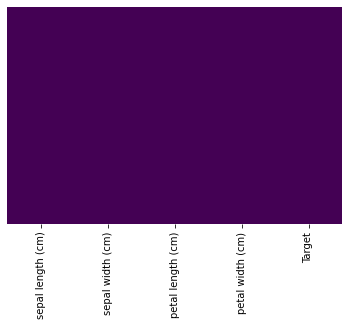

In [46]:
#Visual Representation of df.isnull() values:-

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [47]:
#Checking Duplicated Rows:-

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1


In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df["Target"].value_counts()

0    50
1    50
2    49
Name: Target, dtype: int64

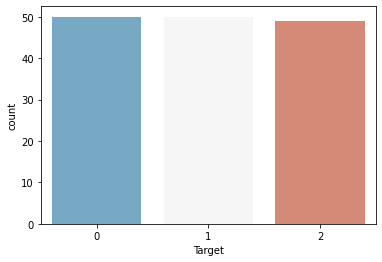

In [50]:
#EDA:-

sns.countplot(x="Target",data=df,palette='RdBu_r')
plt.show()

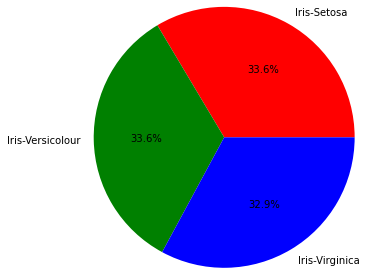

In [51]:
# For Better Visual representation with Pie Chart:-

plt.pie(df['Target'].value_counts(), labels=["Iris-Setosa","Iris-Versicolour","Iris-Virginica"], colors=['red','green','blue'], autopct='%1.1f%%', radius=1.5)
plt.show()

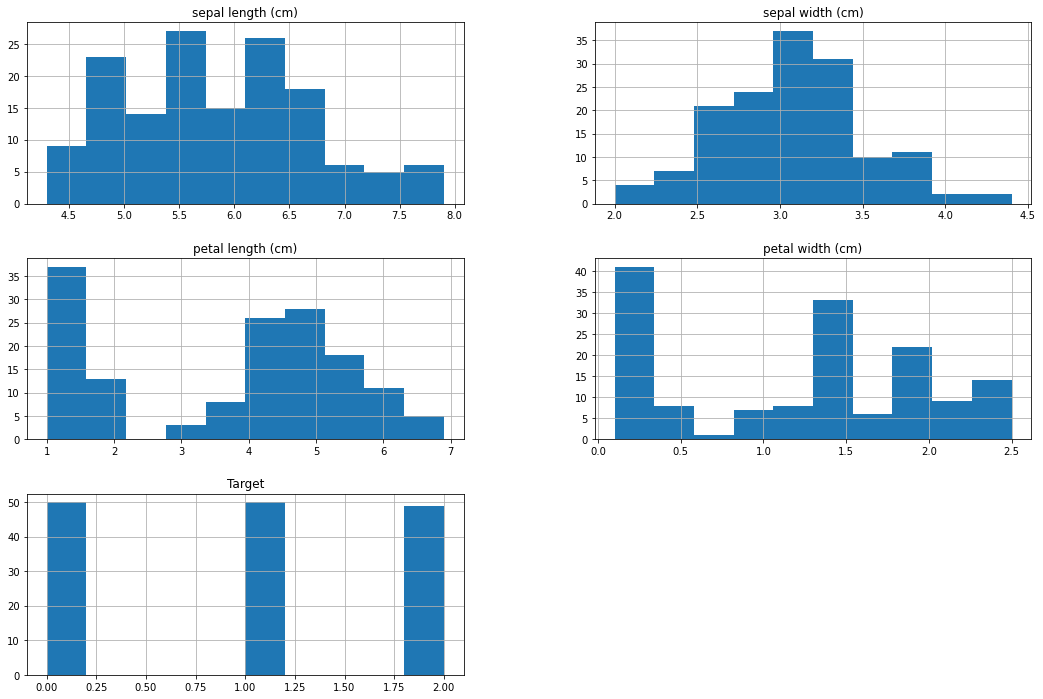

In [52]:
# To check distribution of data and identify outliers:-

df.hist(figsize=(18,12))
plt.show()

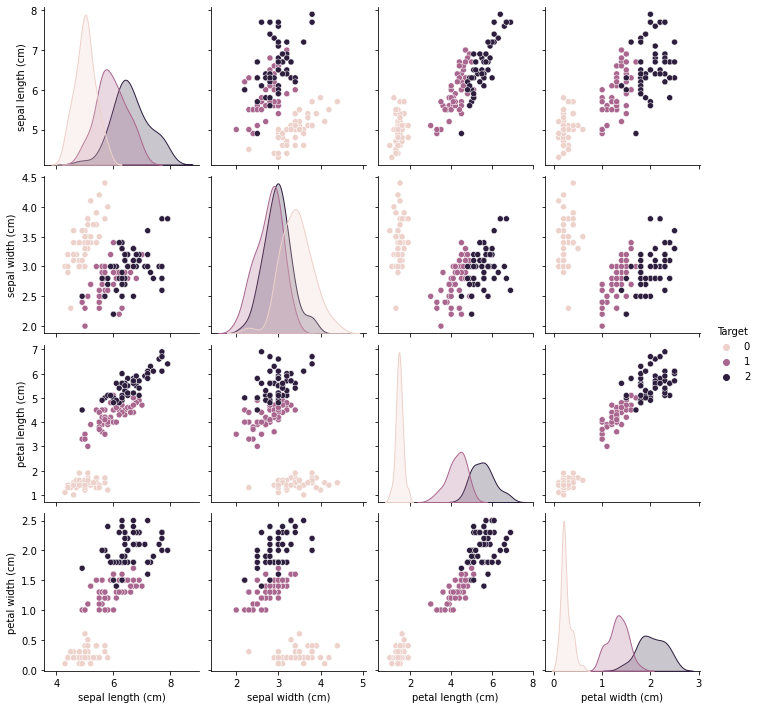

In [53]:
sns.pairplot(data=df,hue="Target")
plt.show()

# Separation of X and Y.

In [54]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

- Once you have X And Y you will do train test split.

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

- Importing all the necessary models:-

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.svm import SVC
svc = SVC()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

- Here i am using all the models to check the Accuracy and find which model provide us best accuracy for this kind of DataSet.

-  Importing Evaluation Metrics:-

In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [58]:
# Defining a Function:-

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(f"Accuracy :- {accuracy_score(ytest,ypred)}")
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))
    return model

In [59]:
mymodel(logreg)

Accuracy :- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[14  0  0]
 [ 0 14  0]
 [ 0  0 10]]


LogisticRegression()

In [60]:
mymodel(knn)

Accuracy :- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[14  0  0]
 [ 0 14  0]
 [ 0  0 10]]


KNeighborsClassifier()

In [61]:
mymodel(svc)

Accuracy :- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[14  0  0]
 [ 0 14  0]
 [ 0  0 10]]


SVC()

In [62]:
mymodel(dtc)

Accuracy :- 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

[[14  0  0]
 [ 0 14  0]
 [ 0  1  9]]


DecisionTreeClassifier()

In [63]:
mymodel(rfc)

Accuracy :- 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.95        38
   macro avg       0.96      0.93      0.94        38
weighted avg       0.95      0.95      0.95        38

[[14  0  0]
 [ 0 14  0]
 [ 0  2  8]]


RandomForestClassifier()